In [ ]:
%%capture
!pip install cvxopt

import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import chi2
from sklearn.neighbors import KernelDensity
from sklearn.mixture import GaussianMixture
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import IsolationForest
import cvxopt

---
## 演習問題1 (25点)

以下の一次元の正規分布の最尤推定問題を考える。

$\hat{\mu}, \hat{\sigma}^2 = \arg\max_{\mu, \sigma^2} \log \prod_{n=1}^N \frac{1}{\sqrt{2 \pi \sigma^2}}\exp\left(-\frac{1}{2 \sigma^2}(x^{(n)} - \mu)^2\right)$

このとき、以下を証明せよ。

* $\hat{\mu} = \frac{1}{N} \sum_{n=1}^N x^{(n)}$

* $\hat{\sigma}^2 = \frac{1}{N} \sum_{n=1}^N \left(x^{(n)} - \hat{\mu}\right)^2$


### 【回答】完了

$\hat{\mu}, \hat{\sigma}^2 = \arg\max_{\mu, \sigma^2} \log \prod_{n=1}^N \frac{1}{\sqrt{2 \pi \sigma^2}}\exp\left(-\frac{1}{2 \sigma^2}(x^{(n)} - \mu)^2\right)$ となるような $\hat{\mu}, \hat{\sigma}^2$ は，それぞれに関して一階微分した値が $0$ となるときである．すなわち，尤度関数 $L \left(\mu, \sigma^2 \right) = \log \prod_{n=1}^N \frac{1}{\sqrt{2 \pi \sigma^2}}\exp\left(-\frac{1}{2 \sigma^2}(x^{(n)} - \mu)^2\right)$ とおくと，それぞれ $\frac{\partial L}{\partial \mu} = 0$ ， $\frac{\partial L}{\partial \sigma^2} = 0$ となる $\mu, \sigma^2$ が平均$\hat{\mu}$と分散$\hat{\sigma}^2$の最尤推定量である．

ここで $N$ 個の標本は互いに独立であるから，尤度関数 $L \left(\mu, \sigma^2 \right)$ を以下のように式変形する．

$$
\begin{aligned}
L \left(\mu, \sigma^2 \right) &= \log \prod_{n=1}^N \frac{1}{\sqrt{2 \pi \sigma^2}}\exp\left(-\frac{1}{2 \sigma^2}(x^{(n)} - \mu)^2\right) \\
&= \sum_{n=1}^N \log \left(\frac{1}{\sqrt{2 \pi \sigma^2}}\exp\left(-\frac{1}{2 \sigma^2}(x^{(n)} - \mu)^2\right) \right) \\
&= N \log \left(\frac{1}{\sqrt{2 \pi \sigma^2}} \right) + \sum_{n=1}^N \log\left(\exp\left(-\frac{1}{2 \sigma^2}(x^{(n)} - \mu)^2\right)\right) \\
&= N \log \left(\frac{1}{\sqrt{2 \pi \sigma^2}} \right) + \left(-\frac{1}{2 \sigma^2}(x^{(1)} - \mu)^2\right) + \left(-\frac{1}{2 \sigma^2}(x^{(2)} - \mu)^2\right) + \cdots + \left(-\frac{1}{2 \sigma^2}(x^{(N)} - \mu)^2\right) \\
&= N \log \left(\frac{1}{\sqrt{2 \pi \sigma^2}} \right) -\frac{1}{2 \sigma^2}\left( (x^{(1)} - \mu)^2 + (x^{(2)} - \mu)^2 + \cdots + (x^{(N)} - \mu)^2 \right)
\end{aligned}
$$

よって，$\left.\frac{\partial L}{\partial \mu}\right|_{\mu=\hat{\mu}}=0$， $\left.\frac{\partial L}{\partial \sigma^2}\right|_{\mu=\hat{\mu},\sigma^2=\hat{\sigma}^2}=0$ は以下のような解を得る．

$$
\begin{aligned}
\left.\frac{\partial L}{\partial \mu}\right|_{\mu=\hat{\mu}} &= -\frac{1}{2 \sigma^2}\left(2(x^{(1)} - \hat{\mu})(-1) + 2(x^{(2)} - \hat{\mu})(-1) + \cdots + 2(x^{(N)} - \hat{\mu})(-1)\right) \\
&= \frac{1}{\sigma^2}\left((x^{(1)} - \hat{\mu}) + (x^{(2)} - \hat{\mu}) + \cdots + (x^{(N)} - \hat{\mu})\right) \\
&= \frac{1}{\sigma^2}\left(x^{(1)} + x^{(2)} + \cdots + x^{(N)}\right) - \frac{N}{\sigma^2}\hat{\mu} = 0
\end{aligned}
$$

$$
\begin{aligned}
\therefore \quad \hat{\mu} = \frac{x^{(1)} + x^{(2)} + \cdots + x^{(N)}}{N} = \frac{1}{N}\sum_{n=1}^N x^{(n)}
\end{aligned}
$$

$$
\begin{aligned}
\left.\frac{\partial L}{\partial \sigma^2}\right|_{\mu=\hat{\mu},\sigma^2=\hat{\sigma}^2} &= \left.\frac{\partial}{\partial\sigma^2}\left(N\log(2\pi\sigma^2)^{-\frac{1}{2}}-\frac{(x^{(1)}-\hat{\mu})^2+(x^{(2)}-\hat{\mu})^2+\cdots+(x^{(N)}-\hat{\mu})^2}{2}(\sigma^2)^{-1}\right)\right|_{\hat{\sigma}^2=\hat{\hat{\sigma}}^2} \\
&= -\frac{1}{2}N\frac{2\pi}{2\pi\hat{\sigma}^2}-\frac{(x^{(1)}-\hat{\mu})^2+(x^{(2)}-\hat{\mu})^2+\cdots+(x^{(N)}-\hat{\mu})^2}{2}(-1)(\hat{\sigma}^2)^{-2} \\
&= -\frac{N}{2\hat{\sigma}^2}+\frac{(x^{(1)}-\hat{\mu})^2+(x^{(2)}-\hat{\mu})^2+\cdots+(x^{(N)}-\hat{\mu})^2}{2}(\hat{\sigma}^2)^{-2} = 0
\end{aligned}
$$

$$
\begin{aligned}
\therefore \quad \hat{\sigma}^2 &= \frac{(x^{(1)}-\hat{\mu})^2+(x^{(2)}-\hat{\mu})^2+\cdots+(x^{(N)}-\hat{\mu})^2}{N} = \frac{1}{N}\sum_{n=1}^N\left(x^{(n)} - \hat{\mu}\right)^2 \\
&&\quad\blacksquare\end{aligned}
$$


---
## 演習問題2 [発展] (10点)

指数型分布族に属する分布を一つ選んで、その分布について以下をまとめよ。 
* どのようなデータを生成する分布か？ 
  * 実数、整数、ベクトル、行列など
  * どのような性質のデータを表現するのに使われるか
* 密度関数の式は？
* 最尤推定の式は？
  * 証明も含む

### 【回答】完了

**二項分布**

- どのようなデータを生成する分布か？
  - 確率変数(事象) $X\in\{0, 1\}$ において 各独立試行の確率 $\mathbf{P}(X)=\left\{\begin{aligned}\theta\quad & (X=1) \\1-\theta\quad & (X=0)\end{aligned}\right|0 \leq \theta \leq 1$ を繰り返すことをベルヌーイ試行という．互いに独立したベルヌーイ試行を $n$ 回繰り返したときに，ある事象 $X\in\{0,1\}$ が何回起こるかの確率分布である．
  - したがって，実数 $\begin{bmatrix}0,1\end{bmatrix}$ の確率を生成する分布であり，「コインを投げたときに表が出るか裏が出るか」のように何かを行ったときに起こる結果(事象)が2つしかないベルヌーイ試行を繰り返しある事象が従う確率のデータを表現するのに使われる．
- 密度関数の式は？

  全試行回数を $n$ ，事象 $X$ の起こる回数を $x$ ，あるパラメータ $/theta$ に従う確率密度関数をf(x;\theta)とすると，下記のように表せる．
  $$
  f(x;\theta)=\left(\begin{aligned}n\\x\end{aligned}\right)\theta^x(1-\theta)^{n-x}={}_n\mathrm{C}_x\theta^x(1-\theta)^{n-x}
  $$

- 最尤推定の式は？
  
  尤度関数 $L(\theta;x)={}_n\mathrm{C}_x\theta^x(1-\theta)^{n-x}$ が最大となるようなパラメータ $\theta=\hat\theta$ を求める．計算の簡単化のために $L(\theta;x)$ と $\log L(\theta;x)$ が単調な関係であることを利用し，尤度関数の対数の最大化に問題を置き換える．
  $$
  \begin{aligned}
  \hat\theta&=\arg\max_\theta\log L(\theta;x) \\
  &=\arg\max_\theta\log \left({}_n\mathrm{C}_x\theta^x(1-\theta)^{n-x}\right) \\
  &=\arg\max_\theta\left(\log{}_n\mathrm{C}_x+\log\theta^x+\log(1-\theta)^{n-x}\right) \\
  &=\arg\max_\theta\left(\log{}_n\mathrm{C}_x+x\log\theta+(n-x)\log(1-\theta)\right)
  \end{aligned}
  $$
  $l(\theta)=\log L(\theta;x)$ とおくと $\left.\frac{\partial l}{\partial\theta}\right|_{\theta=\hat\theta} = 0$ となるような $\theta=\hat\theta$ が対数尤度関数を最大化する最尤推定量である．
  $$
  \begin{aligned}
  \left.\frac{\partial l}{\partial\theta}\right|_{\theta=\hat\theta} &= \left.\frac{\partial}{\partial\theta}\right|_{\theta=\hat\theta}\log{}_n\mathrm{C}_x+\left.\frac{\partial}{\partial\theta}\right|_{\theta=\hat\theta}x\log\theta+\left.\frac{\partial}{\partial\theta}\right|_{\theta=\hat\theta}(n-x)\log(1-\theta) \\
  &=\frac{x}{\hat\theta}-\frac{n-x}{1-\hat\theta} = 0
  \end{aligned}
  $$
  $$
  \begin{aligned}
  \therefore \quad \frac{x}{\hat\theta}&=\frac{n-x}{1-\hat\theta} \\
  x(1-\hat\theta)&=\hat\theta(n-x) \\
  x-x\hat\theta&=n\hat\theta-x\hat\theta \\
  \hat\theta&=\frac{x}{n} \\
  &&\quad\blacksquare\end{aligned}
  $$


---
## 演習問題3 （25点）

正規分布に従わないデータでは、Hotteling’s $T^2$で計算される閾値𝛿と実際の誤判定との割合とが一致しないことを実験的に確認せよ。
* 正規分布以外の分布からデータを生成して閾値𝛿と実際の誤判定割合とを比較せよ。
* どのようなデータ・設定で実験をしたかをきちんと記すこと。

### 【回答】完了

間違え確率を $\epsilon=0.05$ ，閾値 $\delta=3.841458820694124\because\epsilon=1-\int_0^\delta\chi^2(u;1,1) .$ と設定した．一様分布からデータを生成した．閾値 $\delta$ と実際の誤判定割合とを比較すると，N数増加に伴い誤判定割合は単調減少し割合0に収束した．間違え確率 $\epsilon$ に従うことはなかった．


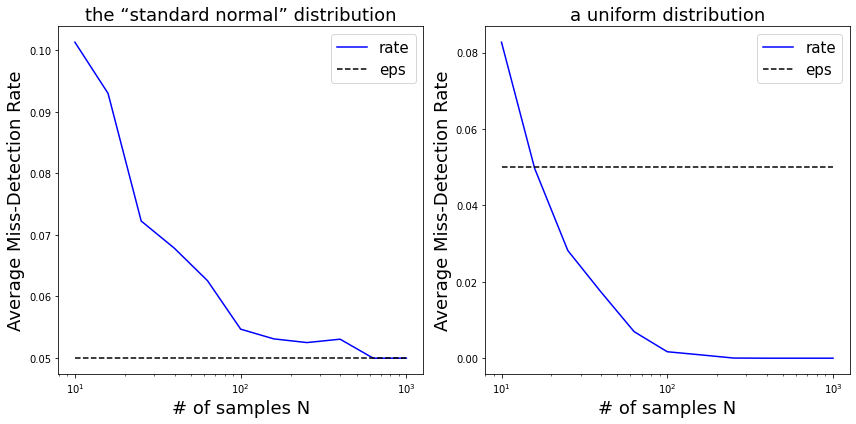

In [ ]:
# 間違え確率と閾値
eps = 0.05
delta = chi2.ppf(1-eps, 1)

# 学習データの個数を変えながら実際に間違えた割合を計算
n_train = np.logspace(1, 3, 11)
c = []
for i, n in enumerate(n_train):
    n = int(n)
    ci = []
    # 100回データを生成して評価
    for seed in range(100):
        # データ生成
        np.random.seed(seed+n)
        x_train = np.random.randn(n)  # 標準正規分布
        x_test = np.random.randn(1000) # テストデータは1000個で固定

        # 平均、標準偏差の推定
        m = np.mean(x_train)
        s = np.std(x_train)

        # 指標の計算
        a = (x_test - m)**2 / s**2

        # 誤りの個数をカウント
        ci.append(np.mean(a >= delta))
    c.append([np.mean(ci), np.std(ci)])
c = np.array(c)

# 結果を描画
myfig = plt.figure(figsize=(12,6))
ax = plt.subplot(1, 2, 1)
ax.set_xscale('log')
plt.plot(n_train, c[:, 0], 'b-')
plt.plot(n_train, [0.05]*n_train.size, 'k--')
plt.xlabel('# of samples N', fontsize=18)
plt.ylabel('Average Miss-Detection Rate', fontsize=18)
plt.legend(['rate', 'eps'], fontsize=15)
plt.title('the “standard normal” distribution', fontsize=18)
myfig.tight_layout()
# plt.show()


# 間違え確率と閾値
eps = 0.05
delta = chi2.ppf(1-eps, 1)

# 学習データの個数を変えながら実際に間違えた割合を計算
n_train = np.logspace(1, 3, 11)
c = []
for i, n in enumerate(n_train):
    n = int(n)
    ci = []
    # 100回データを生成して評価
    for seed in range(100):
        # データ生成
        np.random.seed(seed+n)
        x_train = np.random.rand(n)  # 一様分布[0,1)
        x_test = np.random.rand(1000) # テストデータは1000個で固定
        # x_train = np.random.beta(2, 2, n)  # beta分布
        # x_test = np.random.beta(2, 2, 1000) # テストデータは1000個で固定
        # x_train = np.random.binomial(n, 0.5)  # 二項分布
        # x_test = np.random.binomial(1000, 0.5) # テストデータは1000個で固定
        # x_train = np.random.chisquare(5, n)  # χ^2分布
        # x_test = np.random.chisquare(5, 1000) # テストデータは1000個で固定

        # 平均、標準偏差の推定
        m = np.mean(x_train)
        s = np.std(x_train)

        # 指標の計算
        a = (x_test - m)**2 / s**2

        # 誤りの個数をカウント
        ci.append(np.mean(a >= delta))
    c.append([np.mean(ci), np.std(ci)])
c = np.array(c)

# 結果を描画
ax = plt.subplot(1, 2, 2)
ax.set_xscale('log')
plt.plot(n_train, c[:, 0], 'b-')
plt.plot(n_train, [0.05]*n_train.size, 'k--')
plt.xlabel('# of samples N', fontsize=18)
plt.ylabel('Average Miss-Detection Rate', fontsize=18)
plt.legend(['rate', 'eps'], fontsize=15)
plt.title('a uniform distribution', fontsize=18)
# plt.title('a beta distribution', fontsize=18)
# plt.title('a binomial distribution', fontsize=18)
# plt.title('a chi-square distribution', fontsize=18)
myfig.tight_layout()
plt.show()

In [ ]:
print(delta)

3.841458820694124


---
## 演習問題4 [発展]（10点）

以下の$d$次元の正規分布の最尤推定問題を考える。

$\hat{\mu}, \hat{\Sigma} = \arg\max_{\mu, \Sigma} \log \prod_{n=1}^N \frac{1}{(2 \pi)^{d/2} \sqrt{\det \Sigma}}\exp\left(-\frac{1}{2}(x^{(n)} - \mu)^\top \Sigma^{-1} (x^{(n)} - \mu)\right)$

このとき、以下を証明せよ。

* $\hat{\mu} = \frac{1}{N} \sum_{n=1}^N x^{(n)}$

* $\hat{\Sigma} = \frac{1}{N} \sum_{n=1}^N \left(x^{(n)} - \hat{\mu}\right) \left(x^{(n)} - \hat{\mu}\right)^\top$

### 【回答】完了

$\hat{\mu}, \hat{\Sigma} = \arg\max_{\mu, \Sigma} \log \prod_{n=1}^N \frac{1}{(2 \pi)^{d/2} \sqrt{\det \Sigma}}\exp\left(-\frac{1}{2}(x^{(n)} - \mu)^\top \Sigma^{-1} (x^{(n)} - \mu)\right)$ となるような $\hat{\mu}, \hat{\Sigma}$ は，それぞれに関して一階微分した値が $0$ となるときである．すなわち，尤度関数 $L \left(\mu, \Sigma \right) = \log \prod_{n=1}^N \frac{1}{\sqrt{2 \pi \Sigma}}\exp\left(-\frac{1}{2 \Sigma}(x^{(n)} - \mu)\right)$ とおくと，それぞれ $\frac{\partial L}{\partial \mu} = 0$ ， $\frac{\partial L}{\partial \Sigma} = 0$ となる $\mu, \Sigma$ が平均$\hat{\mu}$と分散$\hat{\Sigma}$の最尤推定量である．

ここで $N$ 個の標本は互いに独立であるから，尤度関数 $L \left(\mu, \Sigma \right)$ を以下のように式変形する．

$$
\begin{aligned}
L \left(\mu, \Sigma \right) &= \log \prod_{n=1}^N \frac{1}{(2 \pi)^{d/2} \sqrt{\det \Sigma}}\exp\left(-\frac{1}{2}(x^{(n)} - \mu)^\top \Sigma^{-1} (x^{(n)} - \mu)\right) \\
&= \sum_{n=1}^N \log \left(\frac{1}{(2 \pi)^{d/2} \sqrt{\det \Sigma}}\exp\left(-\frac{1}{2}(x^{(n)} - \mu)^\top \Sigma^{-1} (x^{(n)} - \mu)\right)\right) \\
&= N \log \left(\frac{1}{(2 \pi)^{d/2} \sqrt{\det \Sigma}} \right) + \sum_{n=1}^N \log\left(\exp\left(-\frac{1}{2}(x^{(n)} - \mu)^\top \Sigma^{-1} (x^{(n)} - \mu)\right)\right) \\
&= N \log \left((2 \pi)^{-\frac{d}{2}}\det\Sigma^{-\frac{1}{2}}\right) + \left(-\frac{1}{2}\Sigma^{-1}(x^{(1)} - \mu)^\top(x^{(1)} - \mu)\right) + \left(-\frac{1}{2}\Sigma^{-1}(x^{(2)} - \mu)^\top(x^{(2)} - \mu)\right) + \cdots + \left(-\frac{1}{2}\Sigma^{-1}(x^{(N)} - \mu)^\top(x^{(N)} - \mu)\right) \\
&= -\frac{Nd}{2}\log\left(2 \pi\right)-\frac{N}{2}\log\left(\det\Sigma\right) -\frac{1}{2}\Sigma^{-1}\left( (x^{(1)} - \mu)^\top(x^{(1)} - \mu) + (x^{(2)} - \mu)^\top(x^{(2)} - \mu) + \cdots + (x^{(N)} - \mu)^\top(x^{(N)} - \mu) \right) \\
\end{aligned}
$$

よって，$\left.\frac{\partial L}{\partial \mu}\right|_{\mu=\hat{\mu}}=0$， $\left.\frac{\partial L}{\partial \Sigma}\right|_{\mu=\hat{\mu},\Sigma=\hat{\Sigma}}=0$ は以下のような解を得る．

$$
\begin{aligned}
\left.\frac{\partial L}{\partial \mu}\right|_{\mu=\hat{\mu}} &= -\frac{1}{2}\Sigma^{-1}\left(2(x^{(1)} - \hat{\mu})(-1) + 2(x^{(2)} - \hat{\mu})(-1) + \cdots + 2(x^{(N)} - \hat{\mu})(-1)\right) \\
&= \Sigma^{-1}\left((x^{(1)} - \hat{\mu}) + (x^{(2)} - \hat{\mu}) + \cdots + (x^{(N)} - \hat{\mu})\right) \\
&= \Sigma^{-1}\left(x^{(1)} + x^{(2)} + \cdots + x^{(N)}\right) - N\Sigma^{-1}\hat{\mu} = 0
\end{aligned}
$$

$$
\begin{aligned}
\therefore \quad \hat{\mu} = \frac{x^{(1)} + x^{(2)} + \cdots + x^{(N)}}{N} = \frac{1}{N}\sum_{n=1}^N x^{(n)}
\end{aligned}
$$

$$
\begin{aligned}
\left.\frac{\partial L}{\partial \Sigma}\right|_{\mu=\hat{\mu},\Sigma=\hat{\Sigma}} &= -\frac{N}{2}\frac{1}{\det\hat\Sigma}\left.\frac{\partial\det\Sigma}{\partial\Sigma}\right|_{\Sigma=\hat\Sigma}-\frac{(x^{(1)} - \hat\mu)^\top(x^{(1)} - \hat\mu) + (x^{(2)} - \hat\mu)^\top(x^{(2)} - \hat\mu) + \cdots + (x^{(N)} - \hat\mu)^\top(x^{(N)} - \hat\mu)}{2}(-1)\hat\Sigma^{-1}\hat\Sigma^{-1} \\
&= -\frac{N}{2}\frac{1}{\det\hat\Sigma}\det\hat\Sigma\left(\hat\Sigma^{-1}\right)^\top + \frac{(x^{(1)} - \hat\mu)^\top(x^{(1)} - \hat\mu) + (x^{(2)} - \hat\mu)^\top(x^{(2)} - \hat\mu) + \cdots + (x^{(N)} - \hat\mu)^\top(x^{(N)} - \hat\mu)}{2}\left(\hat\Sigma^{-1}\right)^2 \\
&= -\frac{N}{2}\left(\hat\Sigma^{-1}\right)^\top+\frac{(x^{(1)} - \hat\mu)^\top(x^{(1)} - \hat\mu) + (x^{(2)} - \hat\mu)^\top(x^{(2)} - \hat\mu) + \cdots + (x^{(N)} - \hat\mu)^\top(x^{(N)} - \hat\mu)}{2}\left(\hat{\Sigma}^{-1}\right)^2 \\
&= -\frac{N}{2}\hat\Sigma^{-1}+\frac{(x^{(1)} - \hat\mu)^\top(x^{(1)} - \hat\mu) + (x^{(2)} - \hat\mu)^\top(x^{(2)} - \hat\mu) + \cdots + (x^{(N)} - \hat\mu)^\top(x^{(N)} - \hat\mu)}{2}\left(\hat{\Sigma}^{-1}\right)^2 \quad\because\hat\Sigma^{-1}は正定値（対称行列）\\
&= 0
\end{aligned}
$$

$$
\begin{aligned}
\therefore \quad \hat{\Sigma} &= \frac{(x^{(1)} - \hat\mu)^\top(x^{(1)} - \hat\mu) + (x^{(2)} - \hat\mu)^\top(x^{(2)} - \hat\mu) + \cdots + (x^{(N)} - \hat\mu)^\top(x^{(N)} - \hat\mu)}{N} \\
&= \frac{1}{N}\sum_{n=1}^N\left(x^{(n)} - \hat\mu\right)\left(x^{(n)} - \hat\mu\right)^\top \\
&&\quad\blacksquare\end{aligned}
$$


---
## 演習問題5 （20点）

* カーネル密度推定を使って外れ値検知をし、結果をAUROCで評価せよ。
* 混合正規分布を使って外れ値検知をし、結果をAUROCで評価せよ。

### 【回答】未完
（原：回答時にはこのコメントを消すこと）

以下のコードに追記する。

回答をここに記入して、ページをPDF出力しての提出も可。

In [ ]:
# 乱数シードの固定
np.random.seed(0)

# 分布のパラメータ
m1 = np.zeros(2)                      # 正規分布1の平均
S1 = np.identity(2)                   # 正規分布1の分散共分散行列
m2 = np.array([6, 4])                 # 正規分布2の平均
S2 = np.array([[1, -0.5], [-0.5, 1]]) # 正規分布2の分散共分散行列
ma = np.array([-3, -3])               # 異常データの正規分布の平均
Sa = np.array([[1, 0.5], [0.5, 1]])   # 異常データの正規分布の分散共分散行列

# データ：学習用
x = np.random.multivariate_normal(m1, S1, 120)
x = np.r_[x, np.random.multivariate_normal(m2, S2, 80)]

# データ：テスト用
y = np.random.multivariate_normal(m1, S1, 200)
y = np.r_[y, np.random.multivariate_normal(m2, S2, 80)]
y = np.r_[y, np.random.multivariate_normal(ma, Sa, 20)] # 外れ値20個を追加

# カーネル密度推定
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(x)

# 混合正規分布推定
gmm = GaussianMixture(n_components=2).fit(x)

# # Following the codes I added.
# print(y.shape)
# print(kde.score_samples(y).shape)
# print(gmm.score_samples(y).shape)
# auroc_kde = roc_auc_score(y, -kde.score_samples(y))
# auroc_gmm = roc_auc_score(y, -gmm.score_samples(y))

# print("AUROC")
# print("KDE : {}".format(auroc_kde))
# print("GMM : {}".format(auroc_gmm))

---
## 演習問題6 （60点）

正規分布、カーネル密度推定、混合正規分布、LOF、SVDD、Isolation Forestを使った外れ値検知それぞれについて結果を比較せよ。それぞれの手法について得意なデータ・不得意なデータの例を述べよ。
* 色々なデータでそれぞれの方法を比較し、どのような場合にどの方法が高い精度で外れ値が検知できるかを検証せよ。
  * 例 正規分布の場合は？ 一様分布の場合は？ 分布の山が複数ある場合は？
  * 次元が1の場合は？ 次元が10の場合は？ 次元が100の場合は？

### 【回答】完了

それぞれ正規分布，一様分布，2つの正規分布の重ね合わせの3つの分布に対する各外れ値検知手法の結果を，次元数ごと(10次元,1次元,100次元)に以下に示した．

 **10 Dimension**

|         |Normal   |Uniform  |Two Normal|
|:-|:-:|:-:|:-:|
|Gauss  |0.969956  |0.956502    |0.817280|
|KDE    |0.956619  |0.956543    |0.843427|
|GMM    |0.969675  |0.955018    |0.921648|
|LOF    |0.924411  |0.951527    |0.864953|
|SVDD   |0.969447  |0.957893    |0.677201|
|IF     |0.965383  |0.952174    |0.882929|

  **1 Dimension**

|         |Normal   |Uniform  |Two Normal|
|:-|:-:|:-:|:-:|
|Gauss  |0.441611  |0.861795    |0.473761|
|KDE    |0.448975  |0.861655    |0.444264|
|GMM    |0.455618  |0.847756    |0.421002|
|LOF    |0.535485  |0.833851    |0.523922|
|SVDD   |0.441867  |0.862890    |0.510697|
|IF     |0.419854  |0.851878    |0.432352|

**100 Dimension**

|       |Normal   |Uniform  |Two Normal|
|:-|:-:|:-:|:-:|
|Gauss     |1.0  |0.934353         |1.0|
|KDE       |1.0  |0.756759         |1.0|
|GMM       |1.0  |0.929496         |1.0|
|LOF       |1.0  |0.920240         |1.0|
|SVDD      |1.0  |0.939838         |1.0|
|IF        |1.0  |0.904891         |1.0|

以上の結果を以下に言語化した．

- 正規分布に対する外れ値検知精度は，各手法総じて高い．10次元ではLOF以外95%超えである．
- 一様分布に対する外れ値検知精度は，各手法総じて高い．10次元では95%超えである．
- 2つの正規分布の重ね合わせに対する外れ値検知精度は，GMMの精度が92.2%と最も高くSVDDの精度が67.7%と最も低かった．（GMMは混合正規分布を用いたものであるから自明の理であると考えられる．）

次元数の外れ値検知精度への影響を以下に記した．

- 1次元の正規分布と2つの正規分布の重ね合わせに対してはLOFの精度が最も高かった．
- 100次元では，正規分布と2つの正規分布の重ね合わせに対しては各手法すべて精度100%と最大値であった．
- 次元数を変化させても一様分布に対する各精度に大きな変化は見受けられなかった．

以上の結果から，次のようにまとめた．

- 次元数が低い(本試行では1次元)場合，LOFが外れ値検知に有効である．
- 次元数が適度な(本試行では10次元)場合，GMMが外れ値検知に有効である．
- 次元数が高い(本試行では100次元)場合，各手法が有効である．
- 正規分布に従わない分布(本試行では一様分布)の場合，各手法で一定の効果を得られる．


In [ ]:
# データの生成（例1）正規分布
def data(dim=2, num_tr=200, num_te=2000, seed=0):
    # 乱数シードの固定
    np.random.seed(seed)

    # 分布のパラメータ
    m1 = np.zeros(dim)                      # 正常データ（正規分布）の平均
    S1 = np.identity(dim)                   # 正常データ（正規分布）の分散共分散行列

    m2 = np.random.rand(dim)                # 異常データ（正規分布）の平均
    L = np.random.rand(dim, dim)
    S2 = L.dot(L.T)
    scale = 1 / np.sqrt(np.diag(S2))
    S2 = S2 / np.outer(scale, scale)        # 異常データ（正規分布）の分散共分散行列

    # データ：学習用
    x = np.random.multivariate_normal(m1, S1, int(1.0*num_tr))
    x = np.r_[x, np.random.multivariate_normal(m2, S2, int(0.0*num_tr))]

    # データ：テスト用
    y = np.random.multivariate_normal(m1, S1, int(0.95*num_te))
    y = np.r_[y, np.random.multivariate_normal(m2, S2, int(0.05*num_te))]
    h = np.r_[np.zeros(int(0.95*num_te)), np.ones(int(0.05*num_te))]

    return x, y, h

x, y, h = data()
print(x.shape,y.shape,h.shape)  # (200, 2) (2000, 2) (2000,)

(200, 2) (2000, 2) (2000,)


In [ ]:
def solveQP(P, q, C):
    m = P.shape[0]
    P = cvxopt.matrix(P)
    q = cvxopt.matrix(q)
    A = cvxopt.matrix(np.ones((1,m)))
    b = cvxopt.matrix(np.array([1.0]))
    G = cvxopt.matrix(np.r_[-np.identity(m), np.identity(m)])
    h = cvxopt.matrix(np.r_[np.zeros(m), C*np.ones(m)])
    cvxopt.solvers.options['show_progress'] = False
    sol = cvxopt.solvers.qp(P,q,A=A,b=b,G=G,h=h)
    ans = np.transpose(np.array(sol['x']))
    return ans[0]

In [ ]:
class Gauss:
    def fit(self, x):
        self.mu = np.mean(x, axis=0)
        self.sigma = np.cov(x.T, bias=True)
        return self

    def anomaly_score(self, x):
        m = x - self.mu[np.newaxis, :]
        if self.sigma.size > 1:
            p = np.linalg.solve(self.sigma, m.T).T
        else:
            p = self.sigma * m
        return np.sum(p * m, axis=1)

class LOF:
    def fit(self, x):
        self.x = x.copy()
        self.nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(x)
        return self

    def anomaly_score(self, x):
        n = x.shape[0]
        dist, ind = self.nbrs.kneighbors(x)
        a = []
        for i in range(n):
            dist_sub, _ = self.nbrs.kneighbors(self.x[ind[i, 0], :][np.newaxis, :])
            a.append(dist[i, 0] / dist_sub[0, 1])
        return np.array(a)

class SVDD:
    def __init__(self, C=0.1, tol=1e-6):
        self.C = C
        self.tol = tol

    def fit(self, x):

        # 最適化問題を解く
        K = x.dot(x.T)
        P = 2 * K
        q = - np.diag(K)
        self.beta = solveQP(P, q, self.C)

        # 球の中心bと半径Rを求める
        idx_boundary = np.where((self.beta >= self.tol) * (self.beta <= self.C - self.tol))[0]
        self.b = x.T.dot(self.beta)
        if self.b.size > 1:
            self.R = np.linalg.norm(x[idx_boundary, :] - self.b, axis=1).max()
        else:
            self.R = x.max() - self.b
            # print("x_max : {}, b : {}, R : {}".format(x.max(),self.b,self.R))
        return self

    def anomaly_score(self, x):
        # 球からの"はみ出し"を計算する
        return np.linalg.norm(x - self.b, axis=1) - self.R

In [ ]:
def evaluate(x, y, h):
    methods = [Gauss(), KernelDensity(kernel='gaussian', bandwidth=0.3), GaussianMixture(n_components=2), LOF(), SVDD(C=0.1), IsolationForest()]
    evals = [lambda v: methods[0].anomaly_score(v),
             lambda v: -methods[1].score_samples(v),
             lambda v: -methods[2].score_samples(v),
             lambda v: methods[3].anomaly_score(v),
             lambda v: methods[4].anomaly_score(v),
             lambda v: -methods[5].decision_function(v)]
    auc = []
    for m, e in zip(methods, evals):
        m = m.fit(x)
        p = e(y)
        auc.append(roc_auc_score(h, p))
    return np.array(auc)

In [ ]:
import pandas as pd

emptyData = {
    'Normal': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    'Uniform': [9., 9., 9., 9., 9., 9.],
    'Two Normal': [9., 9., 9., 9., 9., 9.]
}

method_names = ['Gauss', 'KDE', 'GMM', 'LOF', 'SVDD', 'IF']
df10Dim = pd.DataFrame(emptyData, index = method_names)
df1Dim = pd.DataFrame(emptyData, index = method_names)
df100Dim = pd.DataFrame(emptyData, index = method_names)

In [ ]:
from tqdm.notebook import tqdm
method_names = ['Gauss', 'KDE', 'GMM', 'LOF', 'SVDD', 'IF']
auc = []
for seed in tqdm(range(10)):
    x, y, h = data(dim=10, num_tr=500, num_te=2000, seed=seed)
    a = evaluate(x, y, h)
    auc.append(a)
auc = np.array(auc)
auc_avg = np.mean(auc, axis=0)
print('The Normal Distibution, 10 Dimensions')
print('Average AUROC')
for n, a in zip(method_names, auc_avg):
    print('%s: %.3f' % (n, a))
    df10Dim['Normal'][n] = a


The Normal Distibution, 10 Dimensions
Average AUROC
Gauss: 0.970
KDE: 0.957
GMM: 0.970
LOF: 0.924
SVDD: 0.969
IF: 0.965


In [ ]:
from tqdm.notebook import tqdm
method_names = ['Gauss', 'KDE', 'GMM', 'LOF', 'SVDD', 'IF']
auc = []
for seed in tqdm(range(10)):
    x, y, h = data(dim=1, num_tr=500, num_te=2000, seed=seed)
    a = evaluate(x, y, h)
    auc.append(a)
auc = np.array(auc)
auc_avg = np.mean(auc, axis=0)
print('The Normal Distibution, 1 Dimensions')
print('Average AUROC')
for n, a in zip(method_names, auc_avg):
    print('%s: %.3f' % (n, a))
    df1Dim['Normal'][n] = a


The Normal Distibution, 1 Dimensions
Average AUROC
Gauss: 0.442
KDE: 0.449
GMM: 0.456
LOF: 0.535
SVDD: 0.442
IF: 0.420


In [ ]:
from tqdm.notebook import tqdm
method_names = ['Gauss', 'KDE', 'GMM', 'LOF', 'SVDD', 'IF']
auc = []
for seed in tqdm(range(10)):
    x, y, h = data(dim=100, num_tr=500, num_te=2000, seed=seed)
    a = evaluate(x, y, h)
    auc.append(a)
auc = np.array(auc)
auc_avg = np.mean(auc, axis=0)
print('The Normal Distibution, 100 Dimensions')
print('Average AUROC')
for n, a in zip(method_names, auc_avg):
    print('%s: %.3f' % (n, a))
    df100Dim['Normal'][n] = a


The Normal Distibution, 100 Dimensions
Average AUROC
Gauss: 1.000
KDE: 1.000
GMM: 1.000
LOF: 1.000
SVDD: 1.000
IF: 1.000


In [ ]:
# データの生成（例2）一様分布
def data_uniform(dim=2, num_tr=200, num_te=2000, seed=0):
    # 乱数シードの固定
    np.random.seed(seed)

    # データ：学習用
    x = np.random.rand(int(1.0*num_tr),dim)
    x = np.r_[x, np.random.rand(int(0.0*num_tr),dim)]

    # データ：テスト用
    y = np.random.rand(int(0.95*num_te),dim)
    y = np.r_[y, np.random.rand(int(0.05*num_te),dim)+np.random.rand()]
    h = np.r_[np.zeros(int(0.95*num_te)), np.ones(int(0.05*num_te))]

    return x, y, h

x, y, h = data_uniform()
print(x.shape,y.shape,h.shape)  # (200, 2) (2000, 2) (2000,)

(200, 2) (2000, 2) (2000,)


In [ ]:
from tqdm.notebook import tqdm
method_names = ['Gauss', 'KDE', 'GMM', 'LOF', 'SVDD', 'IF']
auc = []
for seed in tqdm(range(10)):
    x, y, h = data_uniform(dim=10, num_tr=500, num_te=2000, seed=seed)
    a = evaluate(x, y, h)
    auc.append(a)
auc = np.array(auc)
auc_avg = np.mean(auc, axis=0)
print('The Uniform Distibution, 10 Dimensions')
print('Average AUROC')
for n, a in zip(method_names, auc_avg):
    print('%s: %.3f' % (n, a))
    df10Dim['Uniform'][n] = a


The Uniform Distibution, 10 Dimensions
Average AUROC
Gauss: 0.957
KDE: 0.957
GMM: 0.955
LOF: 0.952
SVDD: 0.958
IF: 0.952


In [ ]:
from tqdm.notebook import tqdm
method_names = ['Gauss', 'KDE', 'GMM', 'LOF', 'SVDD', 'IF']
auc = []
for seed in tqdm(range(10)):
    x, y, h = data_uniform(dim=1, num_tr=500, num_te=2000, seed=seed)
    a = evaluate(x, y, h)
    auc.append(a)
auc = np.array(auc)
auc_avg = np.mean(auc, axis=0)
print('The Uniform Distibution, 1 Dimensions')
print('Average AUROC')
for n, a in zip(method_names, auc_avg):
    print('%s: %.3f' % (n, a))
    df1Dim['Uniform'][n] = a


The Uniform Distibution, 1 Dimensions
Average AUROC
Gauss: 0.862
KDE: 0.862
GMM: 0.848
LOF: 0.834
SVDD: 0.863
IF: 0.852


In [ ]:
from tqdm.notebook import tqdm
method_names = ['Gauss', 'KDE', 'GMM', 'LOF', 'SVDD', 'IF']
auc = []
for seed in tqdm(range(10)):
    x, y, h = data_uniform(dim=100, num_tr=500, num_te=2000, seed=seed)
    a = evaluate(x, y, h)
    auc.append(a)
auc = np.array(auc)
auc_avg = np.mean(auc, axis=0)
print('The Uniform Distibution, 100 Dimensions')
print('Average AUROC')
for n, a in zip(method_names, auc_avg):
    print('%s: %.3f' % (n, a))
    df100Dim['Uniform'][n] = a


The Uniform Distibution, 100 Dimensions
Average AUROC
Gauss: 0.934
KDE: 0.757
GMM: 0.929
LOF: 0.920
SVDD: 0.940
IF: 0.905


In [ ]:
# データの生成（例3）2つの正規分布の重ね合わせ
def data_multi(dim=2, num_tr=200, num_te=2000, seed=0):
    # 乱数シードの固定
    np.random.seed(seed)

    # 分布のパラメータ
    m0 = np.zeros(dim)                      # 正常データ0（正規分布）の平均
    S0 = np.identity(dim)                   # 正常データ0（正規分布）の分散共分散行列
    m1 = np.ones(dim)*4                     # 正常データ1（正規分布）の平均
    S1 = np.identity(dim)*2                 # 正常データ1（正規分布）の分散共分散行列

    m2 = np.random.rand(dim)                # 異常データ（正規分布）の平均
    L = np.random.rand(dim, dim)
    S2 = L.dot(L.T)
    scale = 1 / np.sqrt(np.diag(S2))
    S2 = S2 / np.outer(scale, scale)        # 異常データ（正規分布）の分散共分散行列

    # データ：学習用
    x = np.random.multivariate_normal(m0, S0, int(0.4*num_tr))
    x = np.r_[x, np.random.multivariate_normal(m1, S1, int(0.6*num_tr))]
    x = np.r_[x, np.random.multivariate_normal(m2, S2, int(0.0*num_tr))]

    # データ：テスト用
    y = np.random.multivariate_normal(m0, S0, int(0.38*num_te))
    y = np.r_[y, np.random.multivariate_normal(m1, S1, int(0.57*num_te))]
    y = np.r_[y, np.random.multivariate_normal(m2, S2, int(0.05*num_te))]
    h = np.r_[np.zeros(int(0.95*num_te)), np.ones(int(0.05*num_te))]

    return x, y, h

x, y, h = data_multi()
print(x.shape,y.shape,h.shape)  # (200, 2) (2000, 2) (2000,)

(200, 2) (2000, 2) (2000,)


In [ ]:
from tqdm.notebook import tqdm
method_names = ['Gauss', 'KDE', 'GMM', 'LOF', 'SVDD', 'IF']
auc = []
for seed in tqdm(range(10)):
    x, y, h = data_multi(dim=10, num_tr=500, num_te=2000, seed=seed)
    a = evaluate(x, y, h)
    auc.append(a)
auc = np.array(auc)
auc_avg = np.mean(auc, axis=0)
print('The Two Normal Distibution, 10 Dimensions')
print('Average AUROC')
for n, a in zip(method_names, auc_avg):
    print('%s: %.3f' % (n, a))
    df10Dim['Two Normal'][n] = a


The Two Normal Distibution, 10 Dimensions
Average AUROC
Gauss: 0.817
KDE: 0.843
GMM: 0.922
LOF: 0.865
SVDD: 0.677
IF: 0.883


In [ ]:
from tqdm.notebook import tqdm
method_names = ['Gauss', 'KDE', 'GMM', 'LOF', 'SVDD', 'IF']
auc = []
for seed in tqdm(range(10)):
    x, y, h = data_multi(dim=1, num_tr=500, num_te=2000, seed=seed)
    a = evaluate(x, y, h)
    auc.append(a)
auc = np.array(auc)
auc_avg = np.mean(auc, axis=0)
print('The Two Normal Distibution, 1 Dimensions')
print('Average AUROC')
for n, a in zip(method_names, auc_avg):
    print('%s: %.3f' % (n, a))
    df1Dim['Two Normal'][n] = a


The Two Normal Distibution, 1 Dimensions
Average AUROC
Gauss: 0.474
KDE: 0.444
GMM: 0.421
LOF: 0.524
SVDD: 0.511
IF: 0.432


In [ ]:
from tqdm.notebook import tqdm
method_names = ['Gauss', 'KDE', 'GMM', 'LOF', 'SVDD', 'IF']
auc = []
for seed in tqdm(range(10)):
    x, y, h = data_multi(dim=100, num_tr=500, num_te=2000, seed=seed)
    a = evaluate(x, y, h)
    auc.append(a)
auc = np.array(auc)
auc_avg = np.mean(auc, axis=0)
print('The Two Normal Distibution, 100 Dimensions')
print('Average AUROC')
for n, a in zip(method_names, auc_avg):
    print('%s: %.3f' % (n, a))
    df100Dim['Two Normal'][n] = a


The Two Normal Distibution, 100 Dimensions
Average AUROC
Gauss: 1.000
KDE: 1.000
GMM: 1.000
LOF: 1.000
SVDD: 1.000
IF: 1.000


In [ ]:
print("  1 Dimension")
print(df1Dim)
print(" 10 Dimension")
print(df10Dim)
print("100 Dimension")
print(df100Dim)

  1 Dimension
         Normal   Uniform  Two Normal
Gauss  0.441611  0.861795    0.473761
KDE    0.448975  0.861655    0.444264
GMM    0.455618  0.847756    0.421002
LOF    0.535485  0.833851    0.523922
SVDD   0.441867  0.862890    0.510697
IF     0.419854  0.851878    0.432352
 10 Dimension
         Normal   Uniform  Two Normal
Gauss  0.969956  0.956502    0.817280
KDE    0.956619  0.956543    0.843427
GMM    0.969675  0.955018    0.921648
LOF    0.924411  0.951527    0.864953
SVDD   0.969447  0.957893    0.677201
IF     0.965383  0.952174    0.882929
100 Dimension
       Normal   Uniform  Two Normal
Gauss     1.0  0.934353         1.0
KDE       1.0  0.756759         1.0
GMM       1.0  0.929496         1.0
LOF       1.0  0.920240         1.0
SVDD      1.0  0.939838         1.0
IF        1.0  0.904891         1.0
